In [4]:
!pip install modAL


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from modAL.models import ActiveLearner
from sklearn import metrics
from modAL.uncertainty import uncertainty_sampling,margin_sampling,entropy_sampling

import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 


In [13]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

# **using digit_dataset ,LogisticRegression classification and 4 stratigy **

In [6]:
# Load the digit dataset
digits = load_digits()

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.95, random_state=42)

In [7]:
X_train.shape

(89, 64)

## uncertainty sampling 

In [ ]:
# Train an initial machine learning model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using Uncertainty Sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=uncertainty_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

Testing accuracy   : 96.89695550351288 %
MSE [TEST]          : 0.6381733021077284
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.9689695550351288
recall    :  0.9689695550351288
f1_score  :  0.9689695550351288


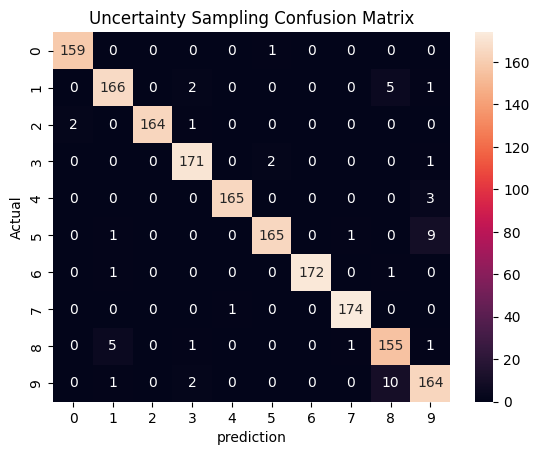

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         3

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.95      0.95      0.95       174
           2       1.00      0.98      0.99       167
           3       0.97 

In [15]:
get_accuracy('Uncertainty Sampling',learner,  X_train, y_train, X_test, y_test )

# **margin sampling**

In [ ]:
# Train an initial machine learning model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using margin_sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=margin_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

Testing accuracy   : 96.13583138173301 %
MSE [TEST]          : 0.7540983606557377
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.9613583138173302
recall    :  0.9613583138173302
f1_score  :  0.9613583138173302


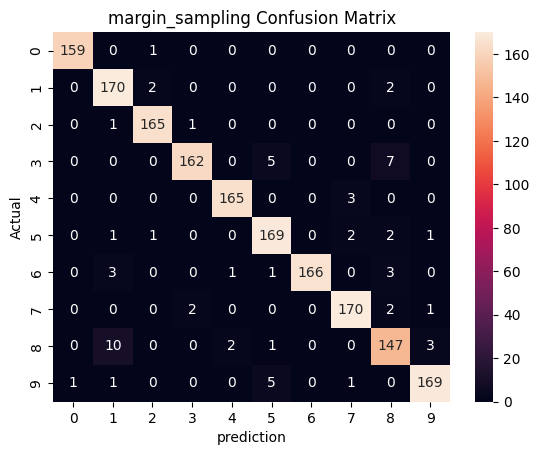

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         3

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.91      0.98      0.94       174
           2       0.98      0.99      0.98       167
           3       0.98 

In [17]:
get_accuracy('margin_sampling',learner,  X_train, y_train, X_test, y_test )

# **entropy  sampling**

In [ ]:
# Train an initial machine learning model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using entropy_sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=entropy_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

Testing accuracy   : 96.25292740046838 %
MSE [TEST]          : 0.7107728337236534
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.9625292740046838
recall    :  0.9625292740046838
f1_score  :  0.9625292740046838


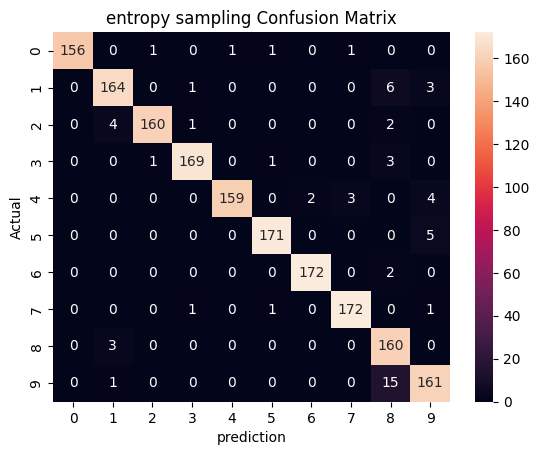

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         3

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       160
           1       0.95      0.94      0.95       174
           2       0.99      0.96      0.97       167
           3       0.98 

In [20]:
get_accuracy('entropy sampling',learner,  X_train, y_train, X_test, y_test )

# **random **

In [21]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=189/digits.data.shape[0], random_state=42)

Testing accuracy   : 91.72885572139303 %
MSE [TEST]          : 1.5199004975124377
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.9172885572139303
recall    :  0.9172885572139303
f1_score  :  0.9172885572139303


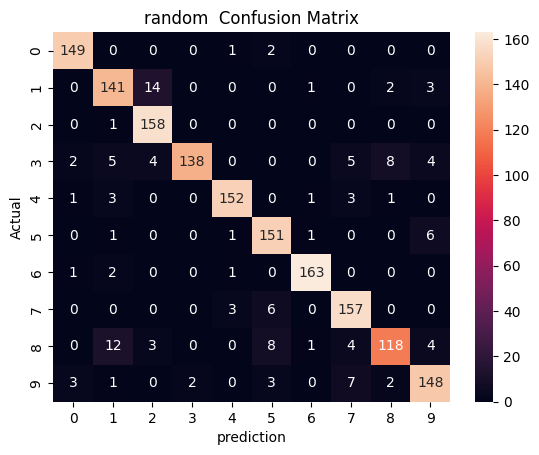

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        14

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       152
           1       0.85      0.88      0.86       161
           2       0.88      0.99      0.93       159
           3       0.99 

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
get_accuracy('random ',model,  X_train, y_train, X_test, y_test )
